In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "recycling"
planning_horizon = 5
gametype = "stackelberg"
sota = False
num_iterations = 1

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(problem.STATES)
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
for type,matrix in problem.REWARDS.items():
    print(type)
    print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


[0, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3]
cooperative
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
zerosum
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  2.   2.]
 [101.  -9.]
 [ -9. 101.]
 [101.  -9.]
 [ 50. -20.]
 [100. 100.]
 [ -9. 101.]
 [100. 100.]
 [-20.  50.]]
stackelberg
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[-20. -87.]
 [-98.  -7.]
 [-66. -70.]
 [-73. -84.]
 [ -7. -88.]
 [-15.  -7.]
 [ 13. -32.]
 [-90. -26.]
 [-47. -97.]]


In [4]:
# check belief objects and expansion

bs = BeliefSpace(planning_horizon,density=0.00001)
bs.expansion()
bs.print_network()
bs.print_belief_table()

	belief expansion done, belief space size = 10

  ∟ belief 0 : [0.5 0.5]
      ∟ action 0, observation 0 : belief 1
      ∟ action 0, observation 1 : belief 0
      ∟ action 0, observation 2 : belief 0
      ∟ action 0, observation 3 : belief 2
      ∟ action 1, observation 0 : belief 0
      ∟ action 1, observation 1 : belief 0
      ∟ action 1, observation 2 : belief 0
      ∟ action 1, observation 3 : belief 0
      ∟ action 2, observation 0 : belief 0
      ∟ action 2, observation 1 : belief 0
      ∟ action 2, observation 2 : belief 0
      ∟ action 2, observation 3 : belief 0
      ∟ action 3, observation 0 : belief 0
      ∟ action 3, observation 1 : belief 0
      ∟ action 3, observation 2 : belief 0
      ∟ action 3, observation 3 : belief 0
      ∟ action 4, observation 0 : belief 0
      ∟ action 4, observation 1 : belief 0
      ∟ action 4, observation 2 : belief 0
      ∟ action 4, observation 3 : belief 0
      ∟ action 5, observation 0 : belief 0
      ∟ action 5, observ

In [5]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations,algorithm="maxplane")
experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


			 Solving stackelberg dectiger GAME Horizon 5 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 8


========== Backup at timestep 4 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 3.5, 	follower value (by state):  [-20.  -7.]
		belief: 1 = [0.96979866 0.03020134] , 	leader value: 5.70805369127517, 	follower value (by state):  [ 13. -26.]
		belief: 2 = [0.03020134 0.96979866] , 	leader value: -98.89387583892618, 	follower value (by state):  [-43.1875 -42.4375]
		belief: 3 = [9.99031124e-01 9.68876343e-04] , 	leader value: 8.894392478648836, 	follower value (by state):  [ 13. -26.]
		belief: 4 = [9.68876343e-04 9.99031124e-01] , 	leader value: -100.50896958206742, 	follower value (by state):  [-43.1875 -42.4375]
		belief: 5 = [9.99969799e-01 3.02009694e-05] , 	leader value: 8.996708094332087, 	follower value (by state):  [ 13. -26.]
		belief: 6 = [3.02009694e-05 9.99969799e-01] , 	leader value: -100.56083139643897, 	follower value (by state):  [-43.1875 

([25.456872624133304],
 [array([-47.40188866, -35.        ])],
 [0.5271670818328857])

In [6]:
experiment.run_experiments()

			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 6


========== Backup at timestep 0 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 9.0, 	follower value (by state):  [9. 9.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

			 Solving cooperative dectiger GAME Horizon 2 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 8


========== Backup at timestep 1 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 9.0, 	follower value (by state):  [9. 9.]
		belief: 1 = [0.96979866 0.03020134] , 	leader value: 17.88590604026846, 	follower value (by state):  [ 20. -50.]
		belief: 2 = [0.03020134 0.96979866] , 	leader value: 17.88590604026846, 	follower value (by state):  [-50.  20.]

========== 

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,1,[0.0293118953704834],6,[9.0],"[[9.0, 9.0]]",0.000001
1,cooperative,Stackelberg,2,1,[0.07711625099182129],8,[18.0],"[[18.0, 18.0]]",0.000001
2,cooperative,Stackelberg,3,1,[0.15583109855651855],10,[27.0],"[[27.0, 27.0]]",0.000001
3,cooperative,Stackelberg,4,1,[0.3034861087799072],12,[36.0],"[[36.0, 36.0]]",0.000001
4,cooperative,Stackelberg,5,1,[0.48769712448120117],12,[45.0],"[[45.0, 45.0]]",0.000001
5,cooperative,State of the Art,1,1,[0.0061779022216796875],6,[9.0],"[[9.0, 9.0]]",0.000001
6,cooperative,State of the Art,2,1,[0.012015104293823242],8,[18.0],"[[18.0, 18.0]]",0.000001
7,cooperative,State of the Art,3,1,[0.026528120040893555],10,[27.0],"[[27.0, 27.0]]",0.000001
8,cooperative,State of the Art,4,1,[0.04696202278137207],12,[36.0],"[[36.0, 36.0]]",0.000001
9,cooperative,State of the Art,5,1,[0.07549810409545898],12,[45.0],"[[45.0, 45.0]]",0.000001


In [7]:
tables = experiment.generate_summary_table()
tables["zerosum"]

/Users/izzikampono/Documents/Thesis/isabelle-stackelberg II/experiment.py:201: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_data = self.database[self.database["SOTA"]==SOTA][self.database["horizon"]==horizon+1][self.database["gametype"]==gametype]
/Users/izzikampono/Documents/Thesis/isabelle-stackelberg II/experiment.py:201: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_data = self.database[self.database["SOTA"]==SOTA][self.database["horizon"]==horizon+1][self.database["gametype"]==gametype]


KeyError: 'values'

In [ ]:
data = experiment.database[experiment.database["gametype"]==gametype][experiment.database["horizon"]==experiment.planning_horizon]

[value[0] for value in  data["values"][data["SOTA"]=="Stackelberg"].to_numpy()[0]]

# [values for values in np.array(data["values"][data["SOTA"]=="Stackelberg"])]

/var/folders/sz/1rmm95756pqfc118zm4kfbt40000gn/T/ipykernel_38557/1340833324.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = experiment.database[experiment.database["gametype"]==gametype][experiment.database["horizon"]==experiment.planning_horizon]


IndexError: invalid index to scalar variable.

/Users/izzikampono/isabelle-stackelberg/experiment.py:227: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/isabelle-stackelberg/experiment.py:227: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]
/Users/izzikampono/isabelle-stackelberg/experiment.py:227: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==self.planning_horizon]


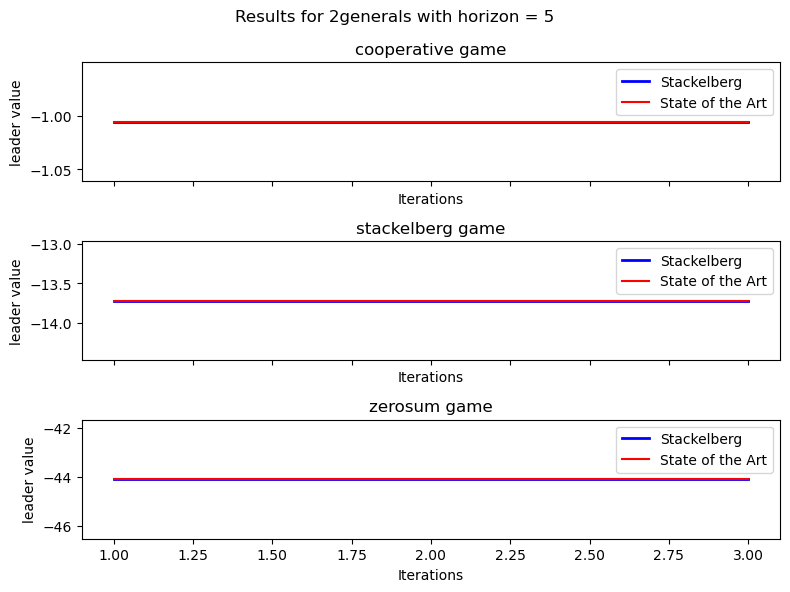

In [ ]:
experiment.plots()

In [ ]:
a= 0
if a is not None: print("YAY")

YAY
